In [1]:
import torch
from dataset import ImageDataset
from config import config as cfg
import PIL
import cv2
import matplotlib.pyplot as plt

In [2]:
dataset = ImageDataset(obj='train', cfg=cfg)

In [53]:
loader = torch.utils.data.DataLoader(dataset, batch_size = 16)

In [9]:
a = next(iter(dataset), 40)

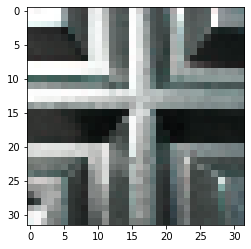

In [10]:
plt.imshow(a.permute(1,2,0))

In [72]:
cv2.imread(dataset.image_path[0])

array([[[250, 255, 253],
        [251, 254, 252],
        [252, 254, 254],
        ...,
        [ 98,  99, 103],
        [103, 104, 108],
        [107, 108, 112]],

       [[250, 255, 253],
        [251, 254, 252],
        [252, 254, 254],
        ...,
        [ 97,  98, 102],
        [107, 108, 112],
        [106, 107, 111]],

       [[249, 254, 252],
        [251, 254, 252],
        [252, 254, 254],
        ...,
        [ 86,  87,  91],
        [107, 108, 112],
        [103, 104, 108]],

       ...,

       [[ 82,  84,  95],
        [ 79,  81,  92],
        [ 81,  83,  93],
        ...,
        [ 43,  50,  53],
        [ 40,  45,  48],
        [ 32,  37,  40]],

       [[ 82,  82,  94],
        [ 81,  81,  93],
        [ 82,  83,  93],
        ...,
        [ 31,  38,  41],
        [ 35,  40,  43],
        [ 31,  36,  39]],

       [[ 87,  85,  97],
        [ 80,  78,  90],
        [ 79,  80,  90],
        ...,
        [ 32,  39,  42],
        [ 30,  35,  38],
        [ 25,  30,  33]]

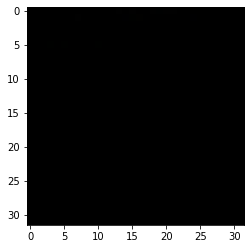

In [69]:
plt.imshow(next(iter(dataset), 18).permute(1,2,0))

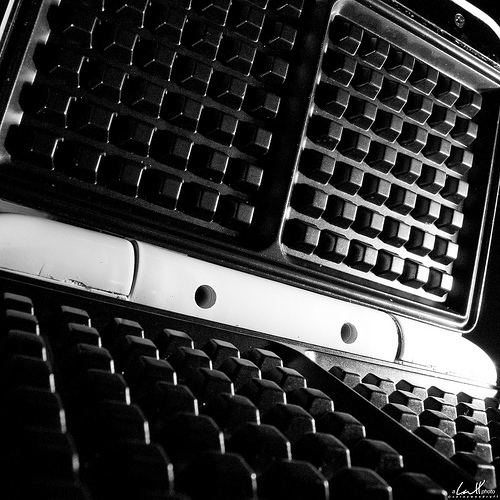

In [8]:
PIL.Image.open(dataset.image_path[2])

In [11]:
import cv2

In [24]:
import numpy as np

a = np.random.randn(224, 224, 1)
np.concatenate([a,a,a], axis=-1).shape

(224, 224, 3)

In [46]:
img = cv2.imread(dataset.image_path[6])
img.shape

(333, 500, 3)